In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
data = pd.read_csv("../Data_final/demo_and_housing.csv", index_col=0)
data = data.select_dtypes(include='number')
data.insert(0, 'price', data.pop('price'))
data

,price,year_built,is_new_construction,beds,baths,baths_beds_ratio,garage,lot_size,building_size,population,...,hhi_200k_or_more,race_and_ethnicity_total,population_density_sq_mi,median_age,educational_attainment_bachelors,educational_attainment_graduate,family_poverty_pct,unemployment_pct,housing_units,median_value_of_owner_occupied_units
zipcode,,,,,,,,,,,,,,,,,,,,,
90001,570000,1906,0,3,2.0,0.6667,3,7057,1756,3966936,...,97,59832,17090.0,29.1,0.048,0.008,0.2329,0.087,14174,359000
90001,470000,1913,0,3,1.5,0.5000,1,5721,1030,3966936,...,97,59832,17090.0,29.1,0.048,0.008,0.2329,0.087,14174,359000
90001,830000,1938,0,3,2.0,0.6667,2,5495,2503,3966936,...,97,59832,17090.0,29.1,0.048,0.008,0.2329,0.087,14174,359000
90001,400000,1905,0,4,2.0,0.5000,2,5387,1248,3966936,...,97,59832,17090.0,29.1,0.048,0.008,0.2329,0.087,14174,359000
90001,659000,1912,0,5,2.0,0.4000,2,5667,1897,3966936,...,97,59832,17090.0,29.1,0.048,0.008,0.2329,0.087,14174,359000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96003,275000,2006,0,3,2.5,0.8333,2,2614,1430,91580,...,844,44328,186.6,40.8,0.172,0.082,0.1121,0.050,19871,262000
96003,899000,1972,0,3,2.0,0.6667,2,1146783,3550,91580,...,844,44328,186.6,40.8,0.172,0.082,0.1121,0.050,19871,262000
96003,483500,1977,0,3,2.0,0.6667,5,89734,2552,91580,...,844,44328,186.6,40.8,0.172,0.082,0.1121,0.050,19871,262000


In [3]:
X = data.iloc[:, 1:].values
y = data.iloc[:, 0].values

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [5]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

1
0.9998645797362794
0.6245174426739719
2
0.5917548603216397
0.7092493223642828
3
0.43961948335843326
0.7335626951778997
4
0.33829444895842475
0.7482811607899751
5
0.32866198694364557
0.5945792026081358
6
0.32292644131614046
0.5113160998432482
7
0.291290790799858
0.5835691437005521
8
0.2668455583086522
0.5992114630330991
9
0.2588489528364526
0.6185440451360645
10
0.24298130180341437
0.5588314489792572


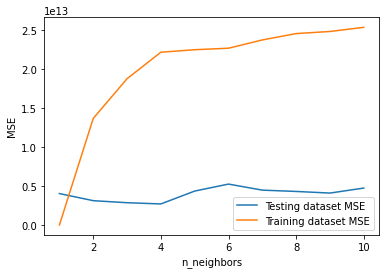

In [6]:
neighbors = np.arange(1, 11)
train_mse = np.empty(len(neighbors))
test_mse = np.empty(len(neighbors))
  

for i, k in enumerate(neighbors):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
      
    # Compute traning and test data accuracy
    train_pred = knn.predict(X_train)
    test_pred = knn.predict(X_test)
    train_error = mean_squared_error(y_train, train_pred)
    test_error = mean_squared_error(y_test,test_pred)
    train_mse[i] = train_error
    test_mse[i] = test_error
    print(k)
    print(knn.score(X_train,y_train))
    print(knn.score(X_test, y_test))

    
plt.plot(neighbors, test_mse, label = 'Testing dataset MSE')
plt.plot(neighbors, train_mse, label = 'Training dataset MSE')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('MSE')
plt.show()